In this analysis, I’ll be exploring the Stack Overflow Developer Survey to gain a deeper understanding of the developer community. I’ll begin with **Programming Language Analysis**, which includes:  

- Determine the most commonly used programming language.  
- Compare the languages used by professionals vs. hobbyists.  
- Analyze which languages are associated with the highest satisfaction levels.
- Explore trends in "languages wanted to learn next" and identify emerging languages.
- Study the popularity of languages across different job roles.  

So without any delay start exploring.

Import necessaries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Mount google colab

In [2]:
from google.colab import drive
drive.mount("/content/mount")

Mounted at /content/mount


In [3]:
file_path = "/content/mount/MyDrive/Data/survey_results_public.csv"
file_path_2 = "/content/mount/MyDrive/Data/survey_results_schema.csv"

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Start coding

In [5]:
df = pd.read_csv(file_path)
schema_df = pd.read_csv(file_path_2, index_col="qname")

In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [7]:
language_worked = df["LanguageHaveWorkedWith"]
language_worked.value_counts().head(20)

,count
LanguageHaveWorkedWith,
HTML/CSS;JavaScript;TypeScript,1002
Python,832
HTML/CSS;JavaScript;PHP;SQL,503
HTML/CSS;JavaScript,452
C#,452
Python;SQL,441
Java,424
C#;HTML/CSS;JavaScript;SQL;TypeScript,408
JavaScript;TypeScript,402


In [8]:
from collections import Counter

# Assuming 'df' is your DataFrame with a column 'LanguageHaveWorkedWith'
data = language_worked.dropna()  # Drops any missing values

# Split each language set into individual languages and count occurrences
languages_list = data.str.split(';').explode()

# Count occurrences using Counter
language_counts = Counter(languages_list)

# Convert Counter to a pandas DataFrame for better display
language_counts_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])

# Sort by count in descending order
language_counts_df = language_counts_df.sort_values(by='Count', ascending=False)

# Display the result
print(language_counts_df)

                   Language  Count
4                JavaScript  37492
2                  HTML/CSS  31816
5                    Python  30719
12                      SQL  30682
6                TypeScript  23150
0   Bash/Shell (all shells)  20412
3                      Java  18239
7                        C#  16318
9                       C++  13827
8                         C  12184
10                      PHP  10951
11               PowerShell   8328
1                        Go   8103
14                     Rust   7559
32                   Kotlin   5665
13                      Lua   3728
28                     Dart   3594
27                 Assembly   3233
17                     Ruby   3147
15                    Swift   2829
16                        R   2595
20      Visual Basic (.Net)   2499
25                   MATLAB   2378
19                      VBA   2248
39                   Groovy   2004
23                    Scala   1547
24                     Perl   1482
41                 G

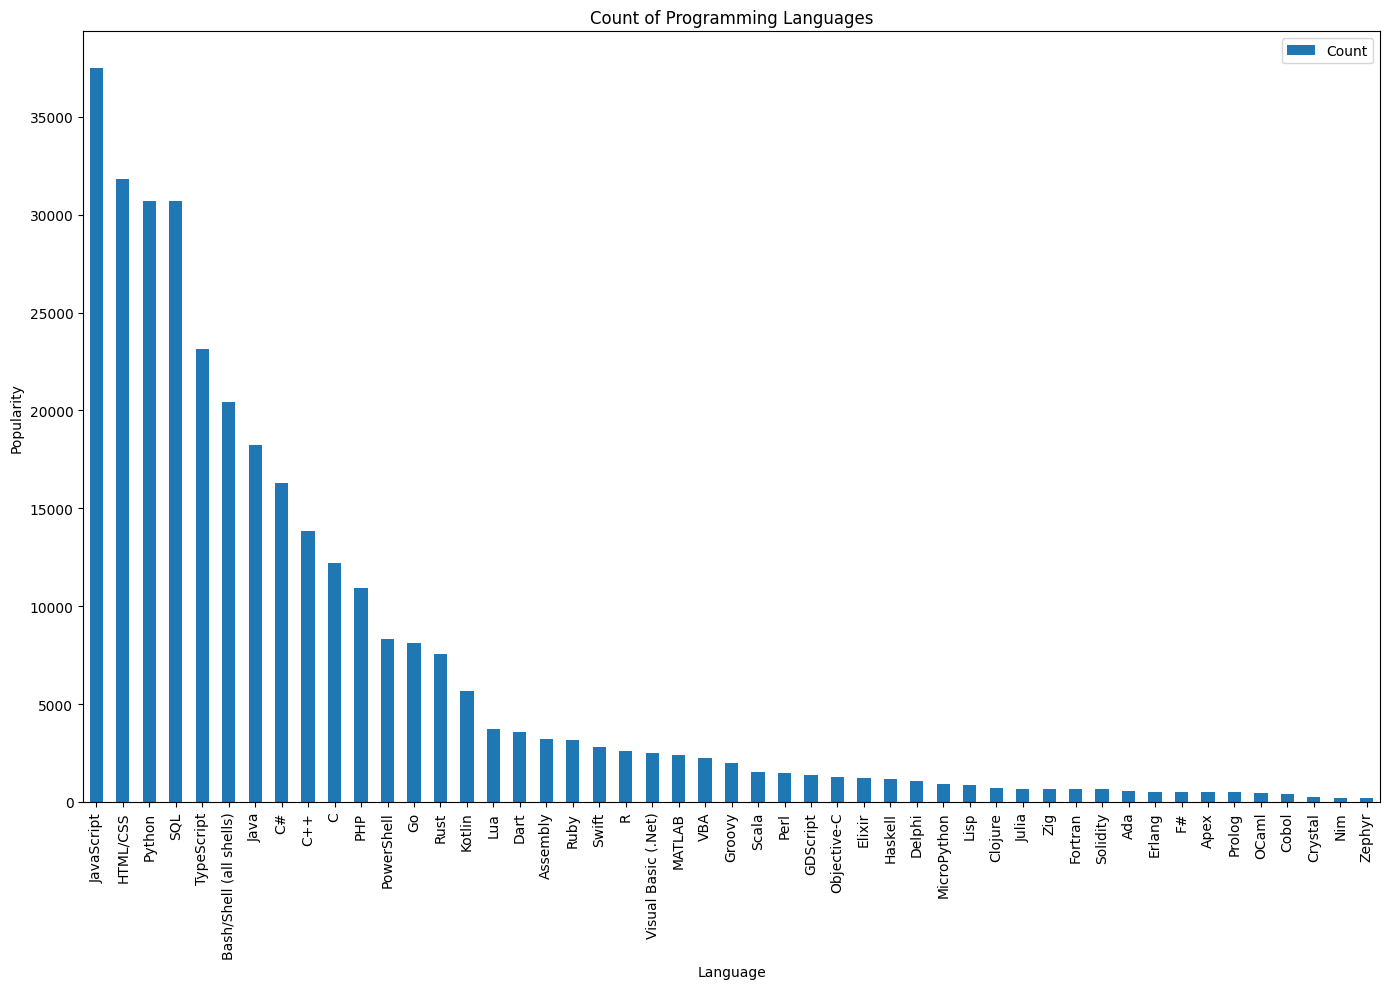

In [9]:
language_counts_df.plot(kind="bar", x="Language", y="Count", figsize=(14, 10))
plt.xlabel('Language')
plt.ylabel('Popularity')
plt.title('Count of Programming Languages')
plt.tight_layout()
plt.show()

In [10]:
language_want_to_learn = df["LanguageWantToWorkWith"]
language_want_to_learn.value_counts().head(20)

,count
LanguageWantToWorkWith,
Python,922
Rust,737
HTML/CSS;JavaScript;TypeScript,632
C#,538
Go,460
Java,331
C#;HTML/CSS;JavaScript;SQL;TypeScript,317
Python;SQL,312
Python;Rust,300


In [11]:
from collections import Counter

data = language_want_to_learn.dropna()

languages_learn_list = data.str.split(';').explode()

language_want_to_learn_count = Counter(languages_learn_list)

language_want_to_learn_df = pd.DataFrame(language_want_to_learn_count.items(), columns=["Language", "Count"])

language_want_to_learn_df = language_want_to_learn_df.sort_values(by="Count", ascending=False)

print(language_want_to_learn_df)


                   Language  Count
6                    Python  25047
4                JavaScript  23774
10                      SQL  22400
2                  HTML/CSS  20721
7                TypeScript  20239
17                     Rust  17232
1                        Go  13837
0   Bash/Shell (all shells)  13744
8                        C#  12921
11                      C++  10873
3                      Java  10668
19                        C   8275
5                    Kotlin   7379
20                      PHP   5745
9                PowerShell   4287
13                    Swift   3877
26                     Dart   3709
25                      Zig   3688
12                      Lua   3322
27                 Assembly   3007
29                   Elixir   2895
16                     Ruby   2774
35                  Haskell   2221
14                        R   2177
24                    Scala   1790
40                 GDScript   1667
22                  Clojure   1331
21                  

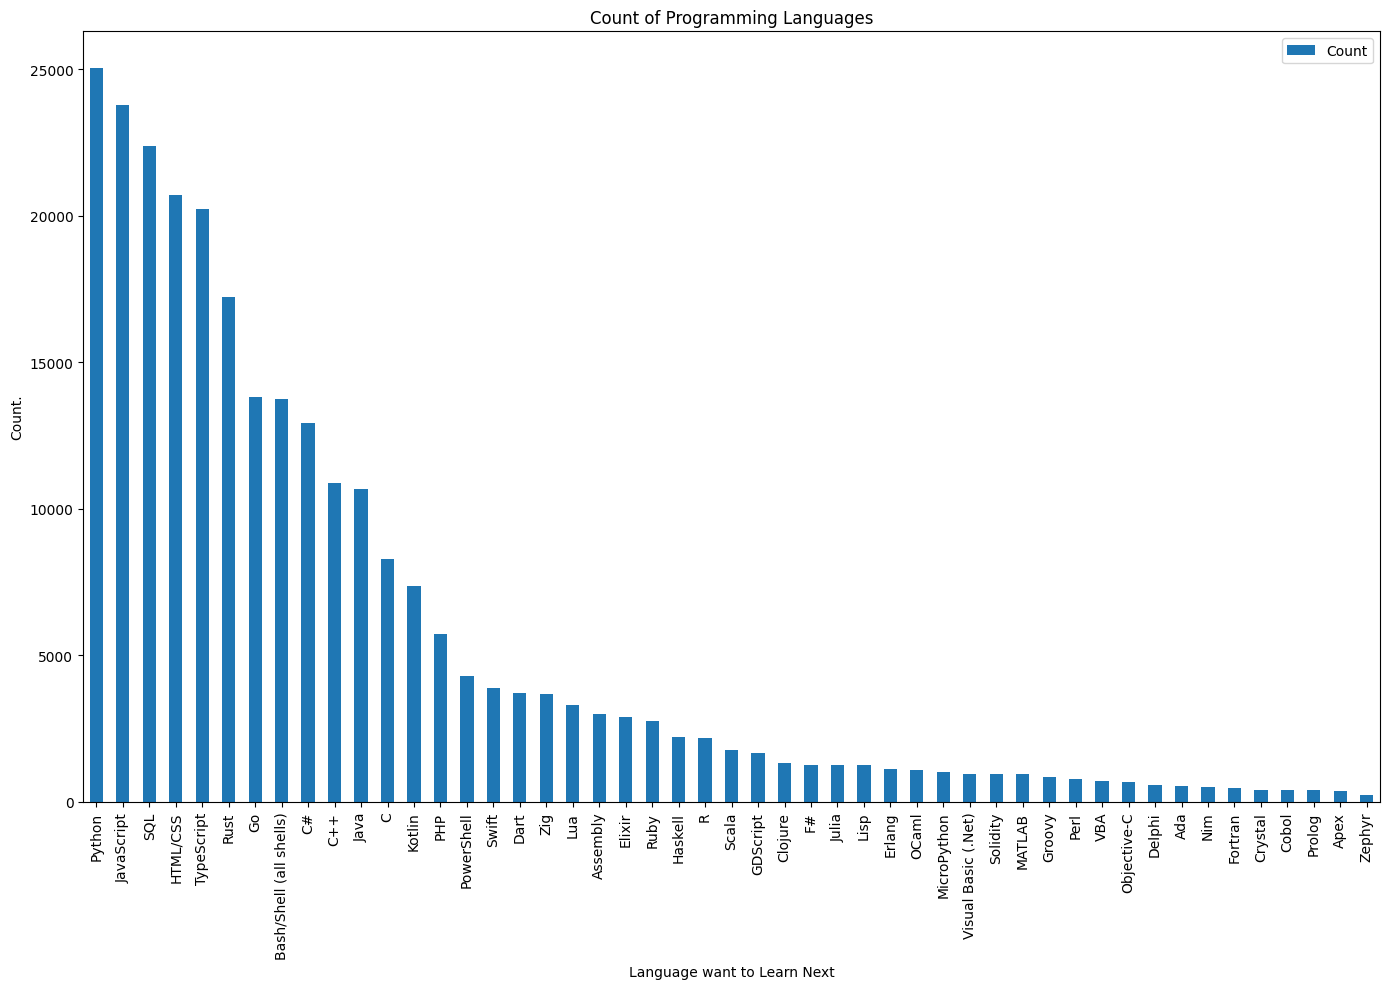

In [12]:
language_want_to_learn_df.plot(kind="bar", x="Language", y="Count", figsize=(14, 10))
plt.xlabel("Language want to Learn Next")
plt.ylabel("Count.")
plt.title("Count of Programming Languages")
plt.tight_layout()
plt.show()

In [13]:
dfcol = df.columns.tolist()
dfcol.sort()
dfcol[20:30]

['BuildvsBuy',
 'BuyNewTool',
 'Check',
 'CodingActivities',
 'CompTotal',
 'ConvertedCompYearly',
 'Country',
 'Currency',
 'DatabaseAdmired',
 'DatabaseHaveWorkedWith']

In [14]:
schema_df.loc["CodingActivities", "question"]

'Which of the following best describes the code you write outside of work? Select all that apply.'

In [15]:
df["CodingActivities"].isnull().sum()

10971

In [16]:
df = df.dropna(subset=["CodingActivities"])

In [17]:
df["CodingActivities"].isnull().sum()

0

In [18]:
df["CodingActivities"].value_counts().head()

,count
CodingActivities,
Hobby,9993
I don’t code outside of work,6508
Hobby;Professional development or self-paced learning from online courses,6203
Hobby;Contribute to open-source projects,3732
Professional development or self-paced learning from online courses,3120


In [19]:
from collections import Counter

data = df["CodingActivities"].dropna()

coding_activities_list = data.str.split(";").explode()

coding_activities_count = Counter(coding_activities_list)

coding_activities_count_df = pd.DataFrame(coding_activities_count.items(), columns=["Coding Activities", "Count"])

coding_activities_count_df = coding_activities_count_df.sort_values(by="Count", ascending=False)

print(coding_activities_count_df)

                                   Coding Activities  Count
0                                              Hobby  37226
6  Professional development or self-paced learnin...  21513
1                 Contribute to open-source projects  13717
7                            Freelance/contract work  10513
4                           Bootstrapping a business   8194
5                            School or academic work   7069
3                       I don’t code outside of work   6508
2                            Other (please specify):   1098


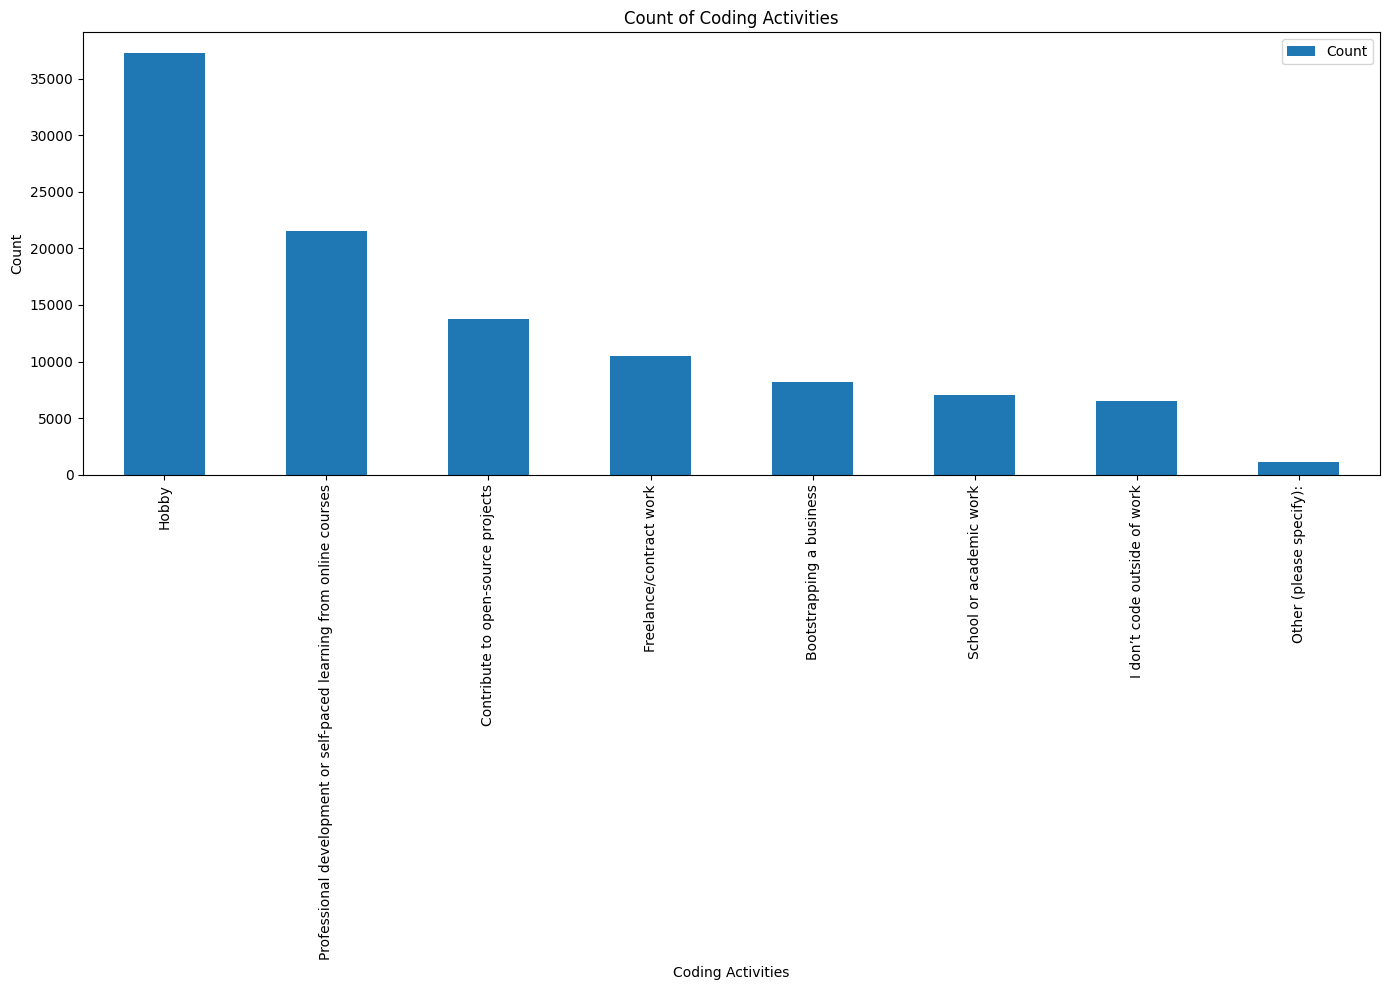

In [20]:
coding_activities_count_df.plot(kind="bar", x="Coding Activities", y="Count", figsize=(14, 10))
plt.xlabel("Coding Activities")
plt.ylabel("Count")
plt.title("Count of Coding Activities")
plt.tight_layout()
plt.show()

In [21]:
df.loc[:, ["CodingActivities", "LanguageHaveWorkedWith", "LanguageWantToWorkWith"]].head(10)

,CodingActivities,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,Hobby,NaN,NaN
1,Hobby;Contribute to open-source projects;Other...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,Hobby;Contribute to open-source projects;Other...,C#,C#
6,I don’t code outside of work,R,R
8,Hobby,Lua,Lua
9,Bootstrapping a business,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript
10,Hobby;Contribute to open-source projects,JavaScript;Python;Ruby,C#;Crystal;Java;JavaScript;Python;Ruby
11,Hobby;School or academic work,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Power...,C#;HTML/CSS;JavaScript;PowerShell;Rust;SQL;Typ...
12,Hobby;Contribute to open-source projects;Profe...,Bash/Shell (all shells);C#;JavaScript;PowerShe...,Bash/Shell (all shells);JavaScript;VBA
14,Hobby;Professional development or self-paced l...,C;C++,C;C++


In [22]:
CodeAsHobbyOnly = df[df["CodingActivities"] == "Hobby"]
CodeAsHobbyOnly.shape

(9993, 114)

In [23]:
CodeAsHobbyOnly.isnull().sum().sample(5)

,0
AISearchDevAdmired,5092
PurchaseInfluence,1228
MiscTechAdmired,5641
YearsCode,703
AISearchDevHaveWorkedWith,3658


In [24]:
CodeAsHobbyOnly = CodeAsHobbyOnly.dropna(subset=["LanguageHaveWorkedWith", "LanguageWantToWorkWith"])
CodeAsHobbyOnly["LanguageHaveWorkedWith"].isnull().sum()

0

In [25]:
CodeAsHobbyOnly.loc[:, ["CodingActivities", "LanguageHaveWorkedWith", "LanguageWantToWorkWith"]].head()

,CodingActivities,LanguageHaveWorkedWith,LanguageWantToWorkWith
8,Hobby,Lua,Lua
15,Hobby,C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...,C#;SQL
21,Hobby,C#;HTML/CSS;Java;PHP;SQL,C#;HTML/CSS;Java;PHP;SQL
27,Hobby,Bash/Shell (all shells);Lua;TypeScript,Bash/Shell (all shells);Lua;Rust;TypeScript;Zig
32,Hobby,Bash/Shell (all shells);JavaScript;PHP;SQL;Typ...,Bash/Shell (all shells);C#;JavaScript;PHP;Pyth...


In [26]:
CodeAsHobbyOnly["LanguageHaveWorkedWith"].value_counts().sum()

8543

In [27]:
from collections import Counter

data = CodeAsHobbyOnly["LanguageHaveWorkedWith"]

hobby_language_list = data.str.split(";").explode()

hobby_language_count = Counter(hobby_language_list)

hobby_language_df = pd.DataFrame(hobby_language_count.items(), columns=["Language", "Count"])

hobby_language_df = hobby_language_df.sort_values(by="Count", ascending=False)

for idx,value in enumerate(hobby_language_df.values):
  print(f"{idx}: {value}")

0: ['JavaScript' 4897]
1: ['SQL' 4243]
2: ['Python' 4080]
3: ['HTML/CSS' 3999]
4: ['TypeScript' 3183]
5: ['Bash/Shell (all shells)' 2881]
6: ['C#' 2563]
7: ['Java' 2355]
8: ['C++' 1709]
9: ['C' 1328]
10: ['PowerShell' 1230]
11: ['PHP' 1230]
12: ['Go' 1040]
13: ['Rust' 946]
14: ['Kotlin' 775]
15: ['Lua' 432]
16: ['Ruby' 390]
17: ['Swift' 366]
18: ['VBA' 339]
19: ['Dart' 329]
20: ['Visual Basic (.Net)' 327]
21: ['Groovy' 288]
22: ['Assembly' 271]
23: ['R' 262]
24: ['MATLAB' 218]
25: ['GDScript' 208]
26: ['Scala' 207]
27: ['Perl' 186]
28: ['Objective-C' 173]
29: ['Delphi' 160]
30: ['Elixir' 143]
31: ['Clojure' 104]
32: ['Haskell' 99]
33: ['Lisp' 94]
34: ['MicroPython' 88]
35: ['F#' 68]
36: ['Zig' 63]
37: ['Apex' 60]
38: ['Fortran' 59]
39: ['Julia' 51]
40: ['Erlang' 50]
41: ['Ada' 47]
42: ['Solidity' 42]
43: ['OCaml' 42]
44: ['Prolog' 37]
45: ['Cobol' 36]
46: ['Nim' 20]
47: ['Zephyr' 18]
48: ['Crystal' 18]


<Axes: ylabel='Count'>

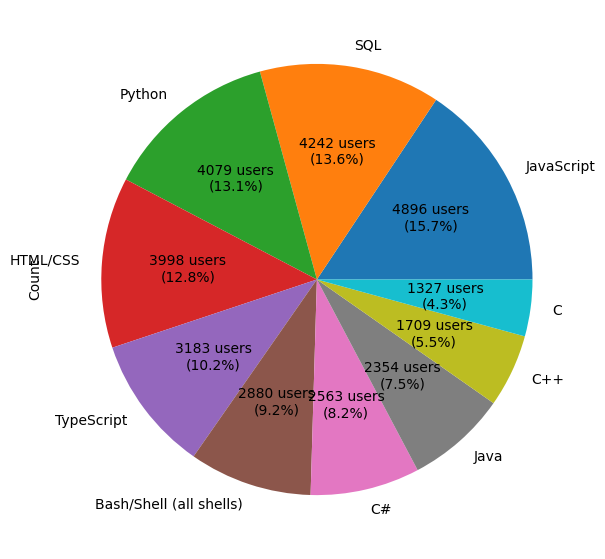

In [28]:
hobby_language_df = hobby_language_df.head(10)
# Define a custom function to show both count and percentage
def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))  # Calculate the absolute count
    return f"{absolute} users\n({pct:.1f}%)"

# Plot the pie chart with both count and percentage
hobby_language_df.set_index('Language')['Count'].plot(kind='pie', autopct=lambda pct: func(pct, hobby_language_df['Count']), figsize=(7,7))

Text(0.5, 1.0, 'Language used by who code as hobby')

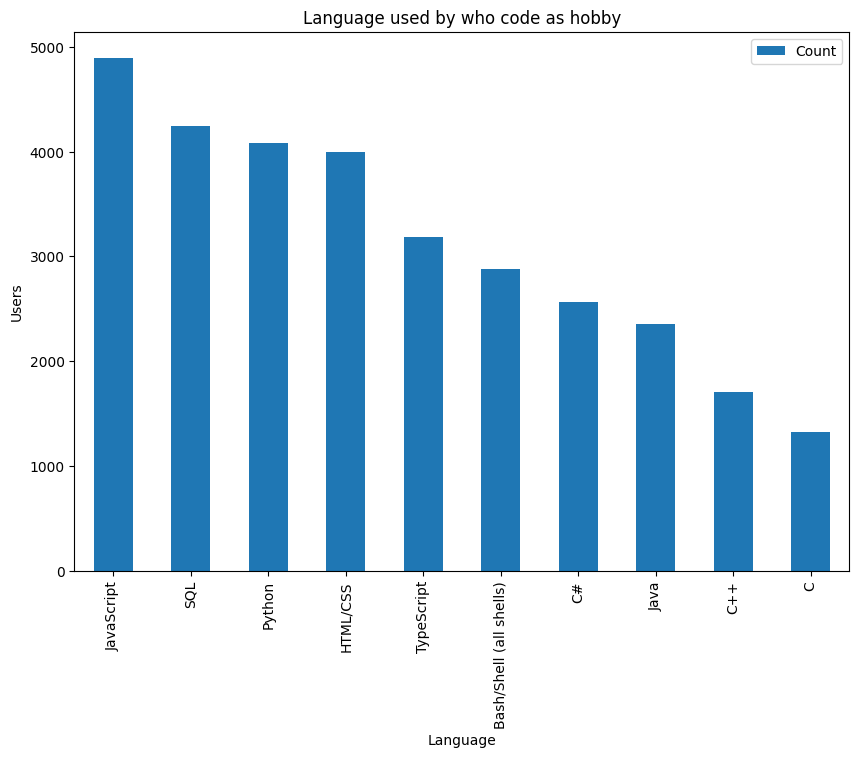

In [29]:
hobby_language_df.plot(kind="bar", x="Language", y="Count", figsize=(10,7))
plt.xlabel("Language")
plt.ylabel("Users")
plt.title("Language used by who code as hobby")

In [30]:
CodeAsAProfessionOnly = df[df["CodingActivities"] == "Professional development or self-paced learning from online courses"]
CodeAsAProfessionOnly.shape

(3120, 114)

In [31]:
CodeAsAProfessionOnly["LanguageHaveWorkedWith"].isnull().sum()

355

In [32]:
CodeAsAProfessionOnly = CodeAsAProfessionOnly.dropna(subset=["LanguageHaveWorkedWith"])

In [33]:
CodeAsAProfessionOnly["LanguageHaveWorkedWith"].isnull().sum()

0

In [34]:
CodeAsAProfessionOnly.shape

(2765, 114)

In [35]:
CodeAsAProfessionOnly["LanguageHaveWorkedWith"].value_counts().head()

,count
LanguageHaveWorkedWith,
HTML/CSS;JavaScript;TypeScript,87
Python,53
Python;SQL,48
Java,44
HTML/CSS;JavaScript,42


In [36]:
from collections import Counter

data = CodeAsAProfessionOnly["LanguageHaveWorkedWith"]

profession_lang_list = data.str.split(";").explode()

profession_lang_count = Counter(profession_lang_list)

profession_lang_df = pd.DataFrame(profession_lang_count.items(), columns=["Language", "Count"])

profession_lang_df = profession_lang_df.sort_values(by="Count", ascending=False)

for idx, value in enumerate(profession_lang_df.values):
  print(f"{idx}: {value}")

0: ['JavaScript' 1638]
1: ['SQL' 1449]
2: ['HTML/CSS' 1322]
3: ['Python' 1107]
4: ['TypeScript' 963]
5: ['Java' 809]
6: ['C#' 678]
7: ['Bash/Shell (all shells)' 658]
8: ['PHP' 424]
9: ['PowerShell' 335]
10: ['C++' 330]
11: ['Go' 247]
12: ['C' 236]
13: ['Kotlin' 195]
14: ['Visual Basic (.Net)' 119]
15: ['Ruby' 111]
16: ['Groovy' 101]
17: ['Rust' 91]
18: ['VBA' 88]
19: ['Dart' 86]
20: ['Swift' 85]
21: ['Scala' 83]
22: ['R' 82]
23: ['MATLAB' 77]
24: ['Assembly' 46]
25: ['Delphi' 43]
26: ['Perl' 39]
27: ['Apex' 37]
28: ['Lua' 37]
29: ['Objective-C' 36]
30: ['Elixir' 35]
31: ['Ada' 23]
32: ['Clojure' 22]
33: ['Solidity' 20]
34: ['Cobol' 20]
35: ['F#' 19]
36: ['Lisp' 16]
37: ['MicroPython' 16]
38: ['Haskell' 16]
39: ['Fortran' 15]
40: ['Erlang' 14]
41: ['Julia' 13]
42: ['Prolog' 11]
43: ['GDScript' 9]
44: ['Zig' 8]
45: ['Crystal' 8]
46: ['Nim' 7]
47: ['Zephyr' 7]
48: ['OCaml' 4]


Text(0.5, 1.0, 'Language used by who code as a profession')

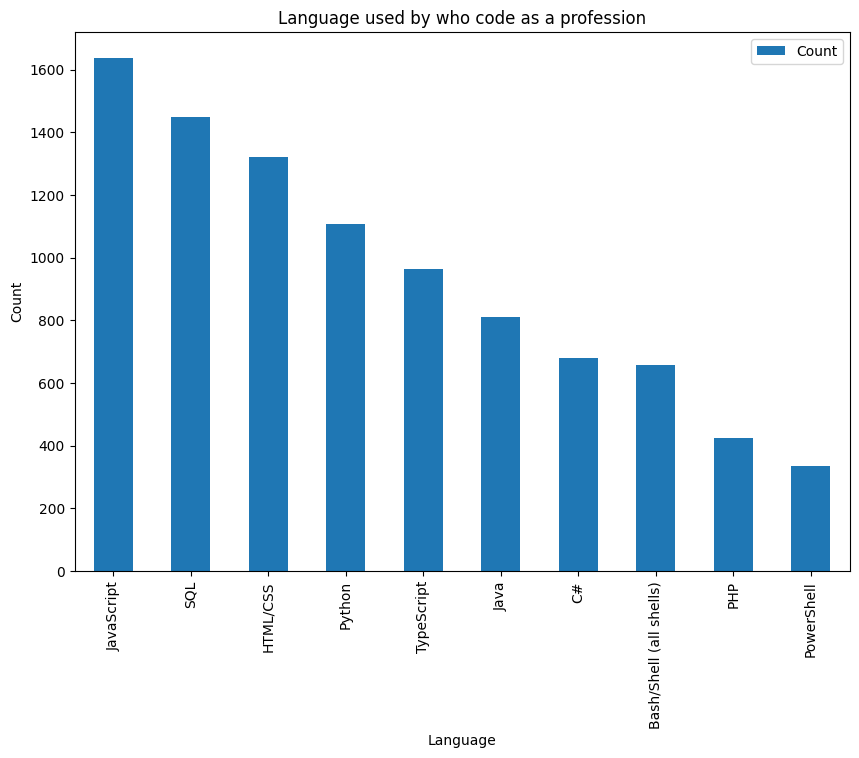

In [37]:
profession_lang_df.head(10).plot(kind="bar", x="Language", y="Count", figsize=(10, 7))
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Language used by who code as a profession")

In [39]:
sorted(df.columns.tolist())

['AIAcc',
 'AIBen',
 'AIChallenges',
 'AIComplex',
 'AIEthics',
 'AINextLess integrated',
 'AINextMore integrated',
 'AINextMuch less integrated',
 'AINextMuch more integrated',
 'AINextNo change',
 'AISearchDevAdmired',
 'AISearchDevHaveWorkedWith',
 'AISearchDevWantToWorkWith',
 'AISelect',
 'AISent',
 'AIThreat',
 'AIToolCurrently Using',
 'AIToolInterested in Using',
 'AIToolNot interested in Using',
 'Age',
 'BuildvsBuy',
 'BuyNewTool',
 'Check',
 'CodingActivities',
 'CompTotal',
 'ConvertedCompYearly',
 'Country',
 'Currency',
 'DatabaseAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DevType',
 'EdLevel',
 'EmbeddedAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'Employment',
 'Frequency_1',
 'Frequency_2',
 'Frequency_3',
 'Frustration',
 'ICorPM',
 'Industry',
 'JobSat',
 'JobSatPoints_1',
 'JobSatPoints_10',
 'JobSatPoints_11',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_6',
 'JobSatPoints_7',
 'JobSatPoints_8',
 'JobSatPoints_9',
 

In [42]:
schema_df.loc["Industry", "question"]

'What industry is the company you work for in?'

In [44]:
df["Industry"].isnull().sum()

25616

In [45]:
df.value_counts("Industry")

,count
Industry,
Software Development,11914
Other:,3076
Fintech,1640
"Internet, Telecomm or Information Services",1629
Banking/Financial Services,1370
Healthcare,1277
Manufacturing,1265
Retail and Consumer Services,1264
Government,961


In [48]:
df = df.dropna(subset="Industry")

In [49]:
df["Industry"].isnull().sum()

0

In [50]:
df.value_counts('Industry')

,count
Industry,
Software Development,11914
Other:,3076
Fintech,1640
"Internet, Telecomm or Information Services",1629
Banking/Financial Services,1370
Healthcare,1277
Manufacturing,1265
Retail and Consumer Services,1264
Government,961


In [53]:
df = df[df["Industry"] != "Other:"]

In [54]:
df.value_counts('Industry')

,count
Industry,
Software Development,11914
Fintech,1640
"Internet, Telecomm or Information Services",1629
Banking/Financial Services,1370
Healthcare,1277
Manufacturing,1265
Retail and Consumer Services,1264
Government,961
Media & Advertising Services,894


In [55]:
print(df[df["Industry"] == "Other:"])

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWan

In [57]:
sorted(df["Industry"].unique())

['Banking/Financial Services',
 'Computer Systems Design and Services',
 'Energy',
 'Fintech',
 'Government',
 'Healthcare',
 'Higher Education',
 'Insurance',
 'Internet, Telecomm or Information Services',
 'Manufacturing',
 'Media & Advertising Services',
 'Retail and Consumer Services',
 'Software Development',
 'Transportation, or Supply Chain']

In [58]:
soft_dev = df[df['Industry'] == "Software Development"]

In [59]:
soft_dev.shape

(11914, 114)

In [60]:
soft_dev.isnull().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,3
Check,0
CodingActivities,0
EdLevel,0
LearnCode,12
LearnCodeOnline,2058


In [61]:
soft_dev = soft_dev.dropna(subset="LanguageHaveWorkedWith")

In [63]:
soft_dev["LanguageHaveWorkedWith"].isna().sum()

0

In [67]:
from collections import Counter

data = soft_dev['LanguageHaveWorkedWith']

soft_dev_list = data.str.split(";").explode()

soft_dev_count = Counter(soft_dev_list)


soft_dev_df = pd.DataFrame(soft_dev_count.items(), columns = ["Language", "Count"])

soft_dev_df = soft_dev_df.sort_values(by="Count", ascending=False)


for idx, value in enumerate(soft_dev_df.values, start=1):
  print(f"{idx}: {value}")

1: ['JavaScript' 7981]
2: ['HTML/CSS' 6579]
3: ['SQL' 6485]
4: ['TypeScript' 5770]
5: ['Python' 5330]
6: ['Bash/Shell (all shells)' 4019]
7: ['Java' 3736]
8: ['C#' 3625]
9: ['C++' 2388]
10: ['PHP' 2386]
11: ['C' 1903]
12: ['Go' 1777]
13: ['PowerShell' 1731]
14: ['Rust' 1426]
15: ['Kotlin' 1344]
16: ['Dart' 860]
17: ['Ruby' 706]
18: ['Swift' 654]
19: ['Lua' 585]
20: ['Visual Basic (.Net)' 446]
21: ['Assembly' 440]
22: ['Groovy' 435]
23: ['Objective-C' 327]
24: ['MATLAB' 308]
25: ['Scala' 307]
26: ['R' 282]
27: ['Elixir' 278]
28: ['VBA' 265]
29: ['Perl' 236]
30: ['GDScript' 224]
31: ['Delphi' 202]
32: ['Haskell' 164]
33: ['Solidity' 144]
34: ['Clojure' 141]
35: ['Lisp' 138]
36: ['MicroPython' 118]
37: ['F#' 114]
38: ['Erlang' 112]
39: ['Zig' 105]
40: ['Apex' 87]
41: ['Prolog' 73]
42: ['Ada' 63]
43: ['Julia' 60]
44: ['Fortran' 59]
45: ['OCaml' 56]
46: ['Cobol' 56]
47: ['Crystal' 36]
48: ['Zephyr' 31]
49: ['Nim' 29]


Text(0, 0.5, 'Count')

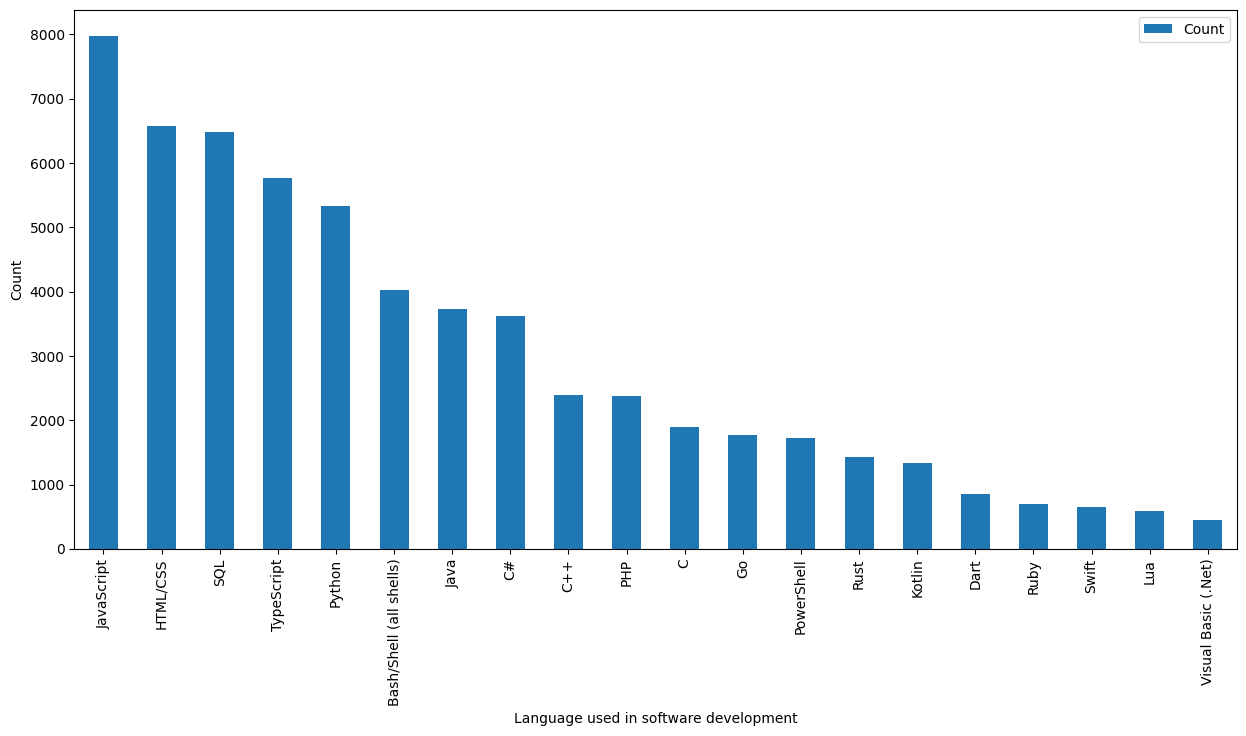

In [70]:
soft_dev_df.head(20).plot(kind="bar", x="Language", y='Count', figsize=(15, 7))
plt.xlabel("Language used in software development")
plt.ylabel("Count")

In [71]:
comp_system_des = df[df["Industry"] == "Computer Systems Design and Services"]

In [72]:
comp_system_des.shape

(844, 114)

In [73]:
comp_system_des["LanguageHaveWorkedWith"].isna().sum()

6

In [74]:
comp_system_des = comp_system_des.dropna(subset="LanguageHaveWorkedWith")

In [75]:
comp_system_des["LanguageHaveWorkedWith"].isna().sum()

0

In [78]:
from collections import Counter
data = comp_system_des["LanguageHaveWorkedWith"]
sys_list = data.str.split(";").explode()
sys_count = Counter(sys_list)
sys_df = pd.DataFrame(sys_count.items(), columns=["Langugae", "Count"])
sys_df = sys_df.sort_values(by="Count", ascending=False)

for idx, value in enumerate(sys_df.values, start=1):
  print(f"{idx}: {value}")

1: ['Python' 534]
2: ['JavaScript' 454]
3: ['SQL' 402]
4: ['Bash/Shell (all shells)' 402]
5: ['HTML/CSS' 397]
6: ['C++' 297]
7: ['C' 289]
8: ['TypeScript' 272]
9: ['Java' 248]
10: ['C#' 212]
11: ['PowerShell' 153]
12: ['Go' 153]
13: ['Rust' 147]
14: ['PHP' 144]
15: ['Assembly' 102]
16: ['Kotlin' 65]
17: ['Lua' 56]
18: ['MATLAB' 50]
19: ['Visual Basic (.Net)' 49]
20: ['Perl' 49]
21: ['Dart' 46]
22: ['Ruby' 44]
23: ['Groovy' 42]
24: ['VBA' 37]
25: ['Swift' 32]
26: ['R' 32]
27: ['Scala' 28]
28: ['Delphi' 26]
29: ['Objective-C' 26]
30: ['Elixir' 19]
31: ['Haskell' 19]
32: ['Cobol' 18]
33: ['Lisp' 18]
34: ['GDScript' 18]
35: ['MicroPython' 18]
36: ['Apex' 14]
37: ['Ada' 13]
38: ['Julia' 12]
39: ['OCaml' 12]
40: ['Fortran' 12]
41: ['Prolog' 12]
42: ['Clojure' 10]
43: ['Erlang' 9]
44: ['F#' 9]
45: ['Zig' 9]
46: ['Crystal' 7]
47: ['Solidity' 7]
48: ['Zephyr' 4]
49: ['Nim' 3]


<Axes: xlabel='Langugae'>

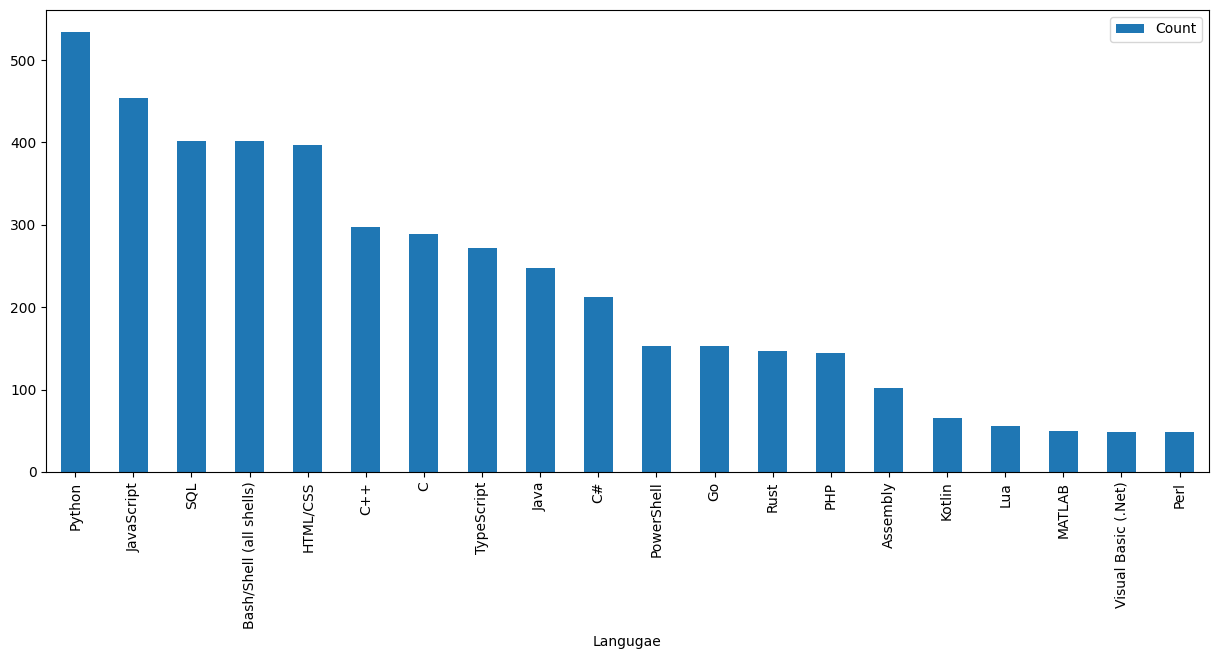

In [80]:
sys_df.head(20).plot(kind="bar", x="Langugae", y="Count", figsize=(15, 6))

In [81]:
Fintech = df[df["Industry"] == "Fintech"]

In [82]:
Fintech.shape

(1640, 114)

In [83]:
Fintech["LanguageHaveWorkedWith"].isna().sum()

7

In [84]:
Fintech = Fintech.dropna(subset="LanguageHaveWorkedWith")

In [85]:
Fintech["LanguageHaveWorkedWith"].isna().sum()

0

In [90]:
from collections import Counter

data = Fintech["LanguageHaveWorkedWith"]
fintech_list = data.str.split(";").explode()
fintech_count = Counter(fintech_list)
fintech_df = pd.DataFrame(fintech_count.items(), columns=["Language", "Count"])
fintech_df = fintech_df.sort_values(by="Count", ascending=False)


for idx, value in enumerate(fintech_df.values, start=1):
  print(f"{idx}: {value}")

1: ['JavaScript' 1027]
2: ['SQL' 951]
3: ['HTML/CSS' 773]
4: ['TypeScript' 751]
5: ['Python' 746]
6: ['Bash/Shell (all shells)' 571]
7: ['Java' 547]
8: ['C#' 424]
9: ['Go' 325]
10: ['PHP' 235]
11: ['C++' 210]
12: ['Kotlin' 197]
13: ['PowerShell' 197]
14: ['Rust' 191]
15: ['C' 189]
16: ['Ruby' 130]
17: ['Groovy' 91]
18: ['Dart' 88]
19: ['Lua' 85]
20: ['Swift' 74]
21: ['Scala' 71]
22: ['Visual Basic (.Net)' 49]
23: ['R' 47]
24: ['Assembly' 47]
25: ['VBA' 46]
26: ['MATLAB' 44]
27: ['Solidity' 41]
28: ['Elixir' 38]
29: ['Clojure' 32]
30: ['Perl' 28]
31: ['Objective-C' 28]
32: ['Haskell' 27]
33: ['Delphi' 24]
34: ['Lisp' 24]
35: ['GDScript' 23]
36: ['F#' 17]
37: ['Apex' 15]
38: ['OCaml' 13]
39: ['Julia' 12]
40: ['Zig' 12]
41: ['MicroPython' 12]
42: ['Cobol' 11]
43: ['Erlang' 10]
44: ['Fortran' 10]
45: ['Ada' 8]
46: ['Prolog' 6]
47: ['Nim' 3]
48: ['Zephyr' 2]
49: ['Crystal' 2]
